# EDA - Breast Cancer Data

# 1.Problem Statement

Chances of serviving of the patients who had brest cancer surgery

# 2.Import Package

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
import warnings
warnings.filterwarnings('ignore') 

# 3 Import Data

In [34]:
data=pd.read_csv('https://raw.githubusercontent.com/Amitra1991/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 3.1 Data Description

1. Data provides information about Age, Years of operation, number of Auxaliray nodes effected and status of patients.
2. Status is 1 means patient survived 5 years or more after operation.
3. Status is 2 means patient survived less than 5 years after operstion. 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


```info``` function gives us the following insights into the df_menu dataframe:

  - The dataframe has **4 columns** and **306 samples**.
  
  - There are **0 missing** values.
  
  - All columns are **numeic by definition**.

# 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 

In [36]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\amitra bhunia\anaconda3\lib\site-packages (2.9.0)


In [21]:
import pandas_profiling
profile = data.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 85.46it/s]


### Observations
- **Dataset info:**
   - Number of variables: 4
   - Number of observations: 306
   - Missing cells: 0 (0.0%)
- **Variables types:**
   - Numeric = 3
   - Categorical = 1
- **Warnings:**
  - Dataset has **17 (5.6%) duplicate rows**.
  - ```Pos_axillary_nodes``` has **136 (44.4%) zeros**


# 4. Data Processing
- Axillary nodes could be zero irrespective of age. So there is no change required.
- We can remove duplicate rows as there is no sufficient proof the data are associated with different patient.

### 4.1 Remove Duplicate data

In [22]:
data_new=data.drop_duplicates().reset_index(drop=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 289 non-null    int64
 1   Years_of_operation  289 non-null    int64
 2   Pos_axillary_nodes  289 non-null    int64
 3   Status              289 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB


### Observations
- Now the dataframe has 289 entries and 4 column. so 17 duplicate rows are removed.

### 4.2 Pandas Profiling after Data Preprocessing

In [23]:
profile = data_new.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.41it/s]


### Observations
- **Dataset info:**
   - Number of variables: 4
   - Number of observations: 306
   - Missing cells: 0 (0.0%)
- **Variables types:**
   - Numeric = 3
   - Categorical = 1
- **Warnings:**
  - ```Pos_axillary_nodes``` has **136 (44.4%) zeros**

# 5. Exploratory Data Analysis

### 5.1 How many patient servived more than 5 years?

Evaluation on status column
1    210
2     79
Name: Status, dtype: int64


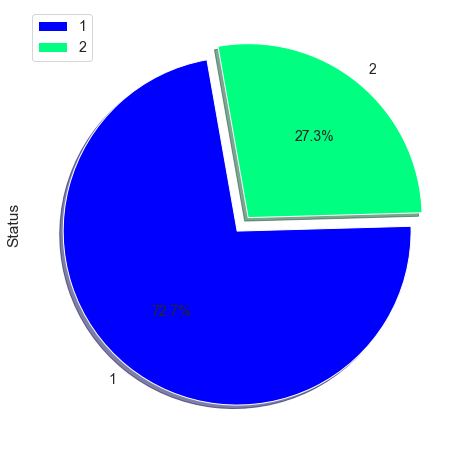

In [24]:
print('Evaluation on status column')
print(data_new['Status'].value_counts())
data_new['Status'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%',figsize=(8,8),shadow=True,startangle=100,legend = True,
                                   cmap='winter')

- In dataframe 72.7% (210) patients servived 5 years or more after operation.
- 27.3% (79) patients died within 5 years after opetation

### 5.2 What is Age of the patients has most breast cancer operation?

Text(0.5, 1.0, 'Age Group vs frequency')

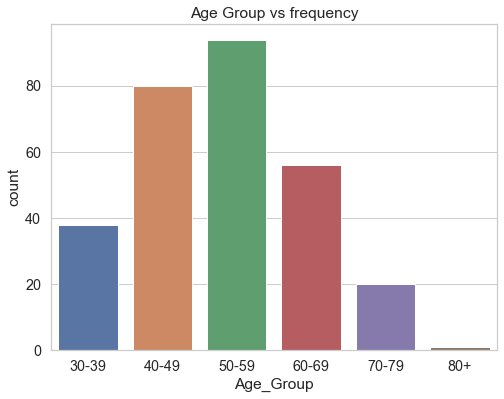

In [25]:
data_new['Age_Group'] = pd.cut(x=data_new['Age'], bins=[30, 39, 49, 59,69,79,89], labels=[ '30-39', '40-49','50-59','60-69',
                                                                                     '70-79','80+'],include_lowest=True)
plt.subplots(figsize=(8,6))
sns.countplot(data = data_new,x = 'Age_Group')
plt.title('Age Group vs frequency')

- The frequency of the operations are high among the ages 40 to 59.
- But this graph does diagram does provide information on the survival status.

### 5.3 What is the status of servival status of the patient according to their age?

Text(0.5, 1.0, 'Age Group vs frequency')

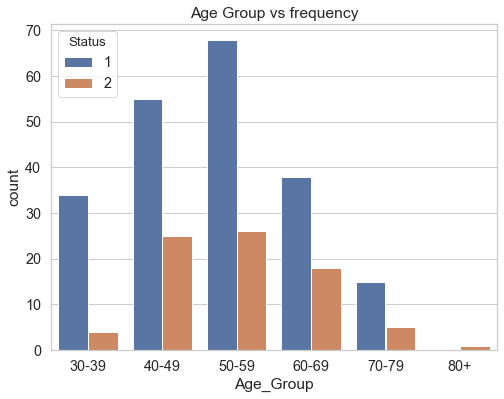

In [26]:
plt.subplots(figsize=(8,6))
sns.countplot(data = data_new,x = 'Age_Group', hue ='Status')
plt.title('Age Group vs frequency')


- We can cee that the most **patients died with in 5 years of operation at the age 40-69 years old**.
- Also **patients servuved 5 years or more arround the same Age as the frequency of the operation is high**.
- There are **no patients survived 5 years and more when age is 80+**.
- Also **Patients' servival chance is 5 years and more when the age is below 40**.
- But here we dont know how the **Number of affected Axillary Nodes**  affecting the survival status.
- Also we cannot determine **Probability of survival statuses** among the age groups.

### 5.4 What is the probability of the survival status among the Ages?

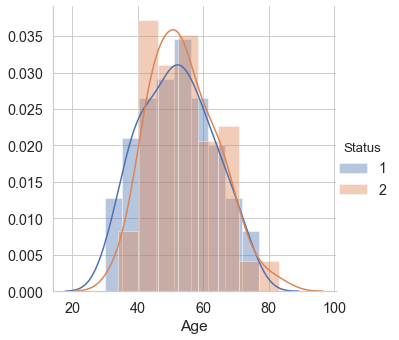

In [27]:
sns.FacetGrid(data_new,hue='Status',height = 5)\
 .map(sns.distplot,'Age')\
 . add_legend()
plt.show()

- Major overlaping observed. That means the chance of the survival does not depends on Age totally.
- Patients more likely survived at the age range 30-40.Patients less likely survived at the age range 40-60. At the age range 60-75 patients have equal chances of survive 5 years and less. At the age range 75+ the survival chances are 0.
- Still we cannot determine the chances of survival based on patient's age. 

### 5.5 What is the chance of survival against auxilary nodes? 

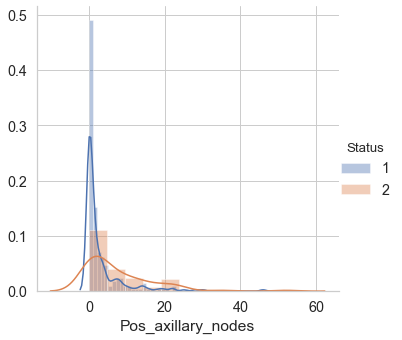

In [28]:
sns.FacetGrid(data_new,hue='Status',height = 5)\
 .map(sns.distplot,'Pos_axillary_nodes')\
 . add_legend()
plt.show()

- Patients with 0 or 1 nodes has more chance to survive 5 years or more. Also the patients with more than 20 affected nodes has very less chance to service 5 years or more.  

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.82380952 0.90952381 0.93333333 0.96190476 0.98095238 0.98571429
 0.9952381  0.9952381  0.9952381  1.        ]


Text(0.5, 1.0, 'CDF of Long Survival')

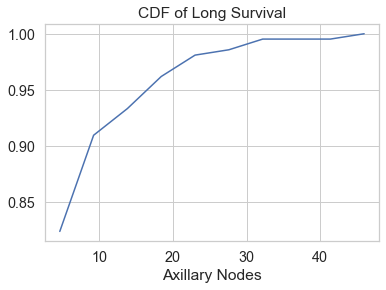

In [29]:
status1 = data_new[data_new['Status']==1].reset_index(drop='True')
status2 = data_new[data_new['Status']==2].reset_index(drop='True')
kwargs = {'cumulative': True}

counts1, bin_edges1 = np.histogram(status1['Pos_axillary_nodes'])
pdf1 = counts1/(sum(counts1))
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
print(cdf1)
#plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1)
plt.xlabel('Axillary Nodes')
plt.title('CDF of Long Survival')

- there are 85% chance of survival 5 years or more when the patients has less than 5 nodes. 

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56962025 0.72151899 0.84810127 0.89873418 0.97468354 0.97468354
 0.98734177 0.98734177 0.98734177 1.        ]


Text(0.5, 1.0, 'CDF of Short Survival')

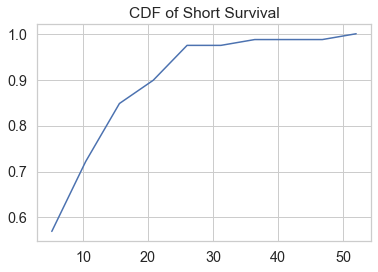

In [30]:
counts2, bin_edges2 = np.histogram(status2['Pos_axillary_nodes'])
pdf2 = counts2/(sum(counts2))
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
print(cdf2)
#plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges2[1:], cdf2)
plt.title('CDF of Short Survival')

- There are 56 % chance of survival less than 5 years when affected axillary node count is <=5.
- Almost 100% chance of survival less than 5 years when affected axillary node count is >40.

### 5.6 What is the distribution of different status Among Age, Operation Year and Nodes?

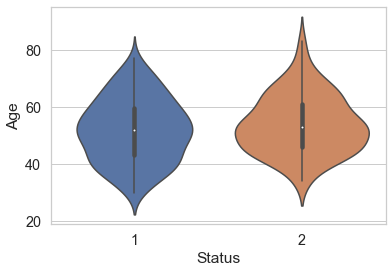

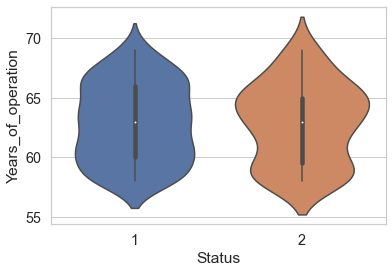

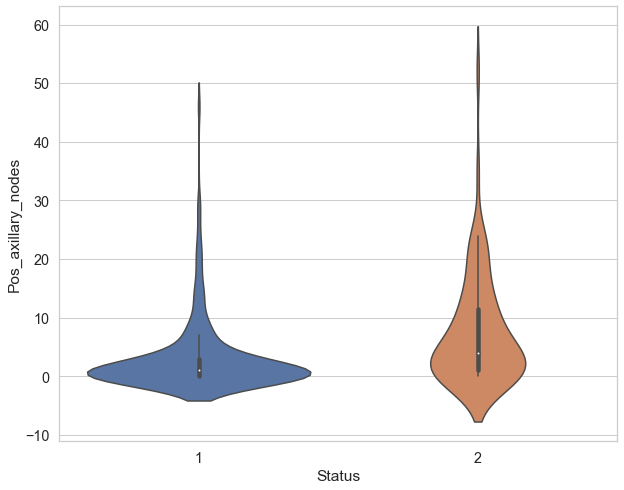

In [31]:

sns.violinplot(x='Status',y='Age',data=data_new)
plt.show()
sns.violinplot(x='Status',y='Years_of_operation',data=data_new)
plt.show()
plt.subplots(figsize=(10,8))
sns.violinplot(x='Status',y='Pos_axillary_nodes',data=data_new)
plt.show()

- Short survival (<5 years) is slightly distributed towards high ages. But more patients in the age group 45 - 55 did not survived 5 years after operation. But Age is not only parameter to determine the status.
- Status vs Year of Operation box plot has similar distribution. But more patients who had operation in the year 1965, survived less than 5 years.
- Density of short servival(<5 years) after operation is high around 0-7 Positive Axillary Nodes found.
- A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
- Patients with more than 1 positive nodes are not likely to survive. More the number of nodes, lesser the survival chances.

### 5.7  How Status is dependent on Age and Positive Nodes together?

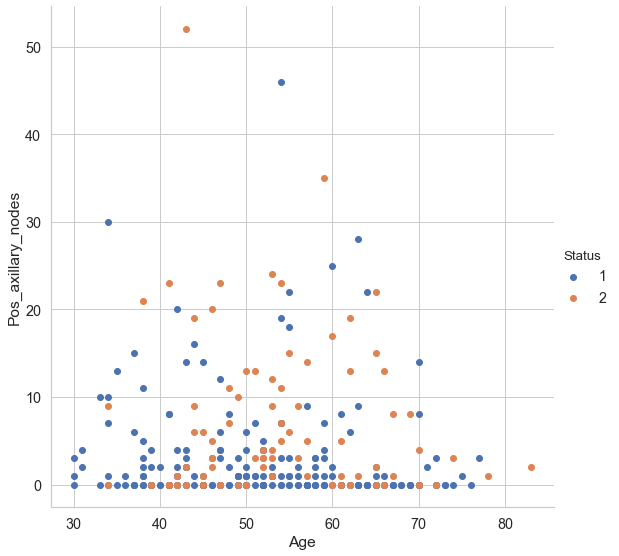

In [32]:
#cmap = sns.cubehelix_palette(dark=.3, light=.7, as_cmap=True)
#plt.subplots(figsize=(10,8))
#sns.scatterplot(data=data_new, x= 'Age', y = 'Pos_axillary_nodes', hue= 'Status' , legend='full' , palette=cmap, size='Status')
sns.set_style('whitegrid')
sns.FacetGrid(data_new, hue='Status', size=8) \
.map(plt.scatter,  'Age', 'Pos_axillary_nodes') \
.add_legend()

- Patients with 0 nodes most likely to survivve 5 years or more.
- Patients of Age 50+ with more than 10 auxillary nodes detected are less likely to survive 5 years ot more.
- Patient deitected most number of infected Auxillary nodes survived less than 5 years.

# 6. Conclusion

- Age and operation year is not only factor to decide patients' survival status. It also depends on number of positive Auxillary nodes.
- Patients less that 40 years old most likely to survive 5 years and more.
- Survival chance is inversely proportional to the number of positive axillary nodes. There are few cases where the absence of positive axillary nodes cannot always guarantee survival.
- Patients aged more than 50 years having 10+ positive Auxillary node are less likely to survive 5 yeas or more.